In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from helpers.assess import make_classification_report, make_confusion_matrix
from helpers.split import make_train_test_split, tag_label_feature_split

In [2]:
def logistic_regression_experiment(
    dataset, optimizer="lbfgs", max_iteration=1000, verbose=0
):

    # load data and separate label strings from features,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")

    df = pd.read_pickle(dataset)
    _, (y, le), X = tag_label_feature_split(df, label_format="encoded")

    # divide into train and test data sets
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y, x_scaler="standard"
    )

    model = LogisticRegression(
        C=100.0,
        solver=optimizer,
        multi_class="multinomial",
        class_weight="balanced",
        max_iter=max_iteration,
        verbose=verbose,
    )

    model.fit(X_train_std, y_train)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    print(f"Train: {train_accuracy = :f}\n")
    make_classification_report(
        y_train,
        model=model,
        x=X_train_std,
        digits=4,
        label_encoder=le,
        print_report=True,
    )
    print(f"Test: {test_accuracy = :f}\n")
    make_classification_report(
        y_test, y_pred=predictions, digits=4, label_encoder=le, print_report=True
    )

    name = os.path.basename(dataset).split(".")[0]
    make_confusion_matrix(
        y_test,
        y_pred=predictions,
        label_encoder=le,
        title=f"{name} test (row normalized)",
    )

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.386007

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.05    0.18      0.08      374  0.06
  genre_classical       0.81    0.72      0.76     4221  0.69
    genre_country       0.09    0.39      0.15      327  0.16
      genre_disco       0.08    0.40      0.13      289  0.15
     genre_hiphop       0.38    0.27      0.32     1701  0.26
       genre_jazz       0.26    0.39      0.32     1241  0.26
      genre_metal       0.25    0.70      0.37      665  0.39
        genre_pop       0.50    0.14      0.22     4274  0.16
     genre_reggae       0.21    0.30      0.25      788  0.21
       genre_rock       0.50    0.31      0.39     3200  0.29
                                                             
         accuracy                         0.39    17080  0.31
        macro avg       0.31    0.38      0.3

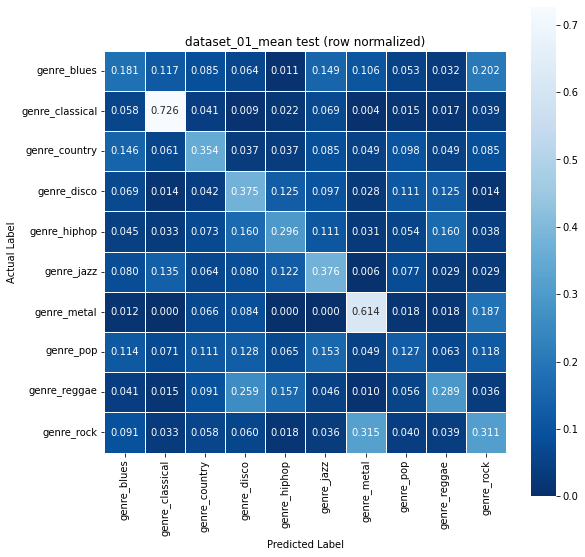



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.511651

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.12    0.39      0.18      374  0.18
  genre_classical       0.86    0.78      0.82     4221  0.76
    genre_country       0.17    0.65      0.27      327  0.31
      genre_disco       0.15    0.65      0.24      289  0.29
     genre_hiphop       0.56    0.46      0.50     1701  0.45
       genre_jazz       0.42    0.54      0.47     1241  0.43
      genre_metal       0.35    0.79      0.49      665  0.50
        genre_pop       0.64    0.25      0.36     4274  0.29
     genre_reggae       0.43    0.63      0.51      788  0.49
       genre_rock       0.62    0.43      0.51     3200  0.43
                                                             
         accuracy                         0.51    17080  0.45
        macro avg       0.43    0.56     

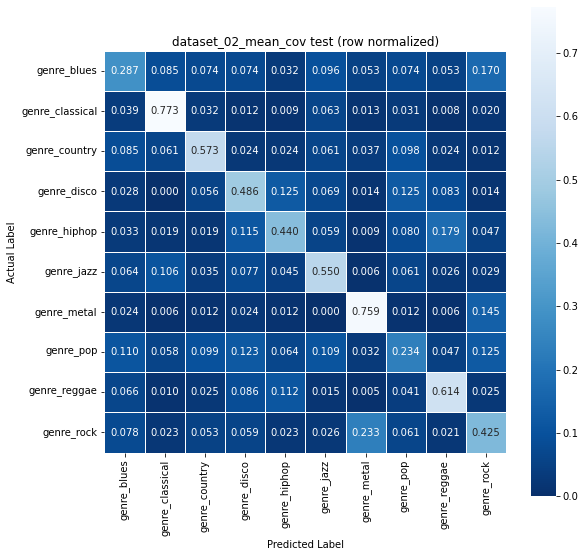



Dataset: ../../../datasets/dataset_03_mean_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.390808

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.06    0.19      0.09      374  0.07
  genre_classical       0.81    0.71      0.76     4221  0.69
    genre_country       0.09    0.43      0.15      327  0.17
      genre_disco       0.10    0.44      0.16      289  0.18
     genre_hiphop       0.38    0.23      0.28     1701  0.24
       genre_jazz       0.27    0.40      0.32     1241  0.27
      genre_metal       0.26    0.69      0.38      665  0.39
        genre_pop       0.52    0.13      0.21     4274  0.16
     genre_reggae       0.22    0.49      0.30      788  0.28
       genre_rock       0.52    0.32      0.40     3200  0.31
                                                             
         accuracy                         0.39    17080  0.32
        macro avg       0.32    0.40      0.31    17080      
     weighted avg       0.51    0.39

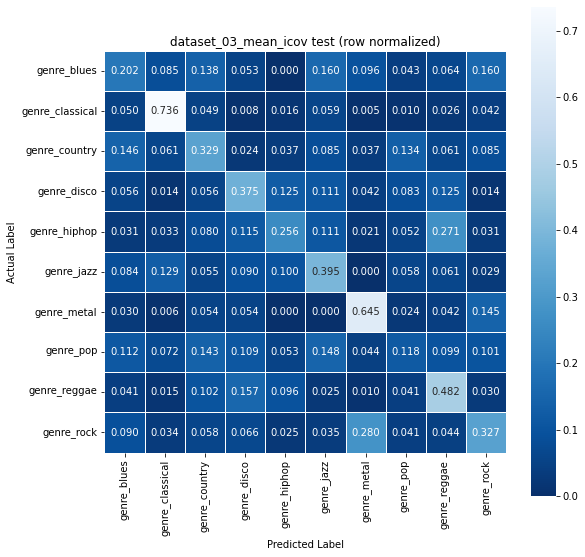



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.507845

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.12    0.40      0.19      374  0.19
  genre_classical       0.86    0.77      0.81     4221  0.76
    genre_country       0.17    0.66      0.27      327  0.31
      genre_disco       0.15    0.66      0.24      289  0.29
     genre_hiphop       0.56    0.46      0.50     1701  0.46
       genre_jazz       0.41    0.55      0.47     1241  0.43
      genre_metal       0.35    0.79      0.49      665  0.50
        genre_pop       0.62    0.23      0.34     4274  0.28
     genre_reggae       0.42    0.64      0.51      788  0.49
       genre_rock       0.62    0.43      0.51     3200  0.43
                                                             
         accuracy                         0.51    17080  0.45
        macro avg       0.43    0.56      0.43    17080      
     weighted avg       0.61    0.51

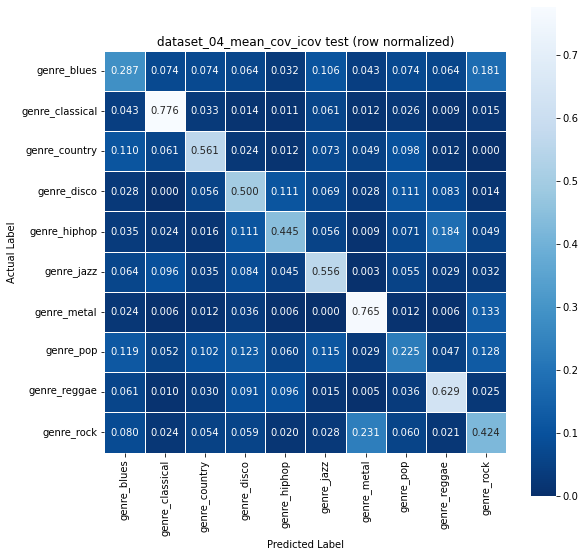



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.416745

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.04    0.04      0.04      374  0.01
  genre_classical       0.87    0.77      0.82     4221  0.76
    genre_country       0.07    0.29      0.12      327  0.11
      genre_disco       0.11    0.45      0.17      289  0.19
     genre_hiphop       0.36    0.25      0.29     1701  0.24
       genre_jazz       0.31    0.41      0.35     1241  0.30
      genre_metal       0.24    0.78      0.37      665  0.40
        genre_pop       0.55    0.16      0.25     4274  0.19
     genre_reggae       0.25    0.55      0.34      788  0.32
       genre_rock       0.43    0.33      0.37     3200  0.26
                                                             
         accuracy                         0.42    17080  0.34
        macro avg       0.32    0.40      0.3

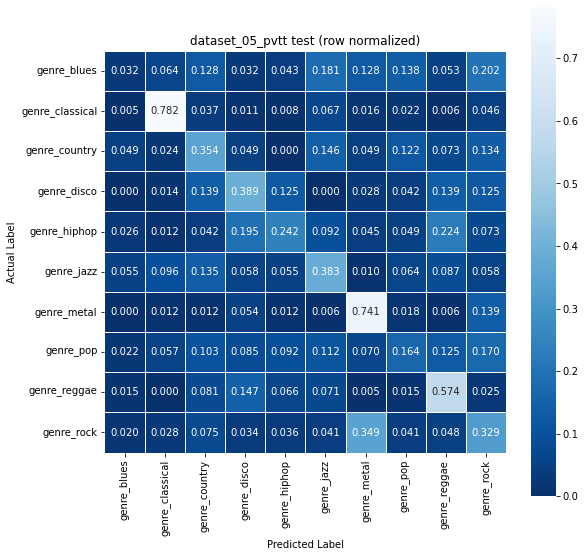



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.464052

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.07    0.20      0.10      374  0.09
  genre_classical       0.88    0.79      0.84     4221  0.79
    genre_country       0.11    0.43      0.17      327  0.19
      genre_disco       0.11    0.47      0.18      289  0.20
     genre_hiphop       0.49    0.41      0.45     1701  0.39
       genre_jazz       0.36    0.46      0.40     1241  0.35
      genre_metal       0.30    0.75      0.42      665  0.44
        genre_pop       0.59    0.18      0.27     4274  0.22
     genre_reggae       0.32    0.55      0.40      788  0.38
       genre_rock       0.55    0.39      0.46     3200  0.36
                                                             
         accuracy                         0.46    17080  0.40
        macro avg       0.38    0.46    

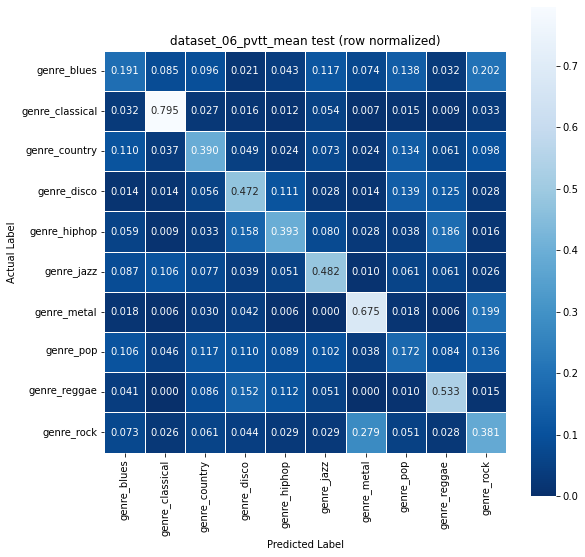



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.549005

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.13    0.42      0.20      374  0.20
  genre_classical       0.89    0.82      0.86     4221  0.81
    genre_country       0.20    0.69      0.31      327  0.35
      genre_disco       0.17    0.71      0.28      289  0.33
     genre_hiphop       0.61    0.54      0.57     1701  0.53
       genre_jazz       0.45    0.59      0.51     1241  0.47
      genre_metal       0.37    0.79      0.50      665  0.51
        genre_pop       0.66    0.27      0.38     4274  0.32
     genre_reggae       0.47    0.69      0.56      788  0.55
       genre_rock       0.65    0.46      0.54     3200  0.46
                                                             
         accuracy                         0.55    17080  0.49
        macro avg       0.46    0.60      0.47    17080      
     weighted avg       0.65    0.55

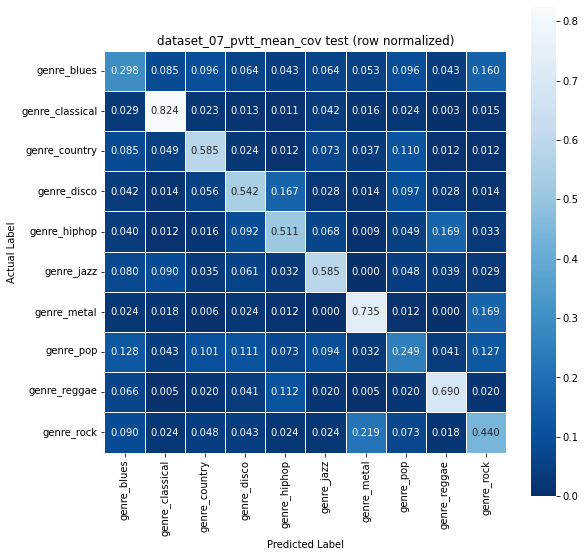



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.466920

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.07    0.21      0.11      374  0.09
  genre_classical       0.88    0.79      0.83     4221  0.78
    genre_country       0.11    0.48      0.18      327  0.20
      genre_disco       0.12    0.50      0.20      289  0.22
     genre_hiphop       0.48    0.41      0.44     1701  0.39
       genre_jazz       0.37    0.47      0.41     1241  0.36
      genre_metal       0.30    0.76      0.43      665  0.45
        genre_pop       0.59    0.18      0.27     4274  0.22
     genre_reggae       0.32    0.58      0.42      788  0.40
       genre_rock       0.56    0.39      0.46     3200  0.37
                                                             
         accuracy                         0.47    17080  0.40
        macro avg       0.38    0.48      0.38    17080      
     weighted avg       0.58    0.47

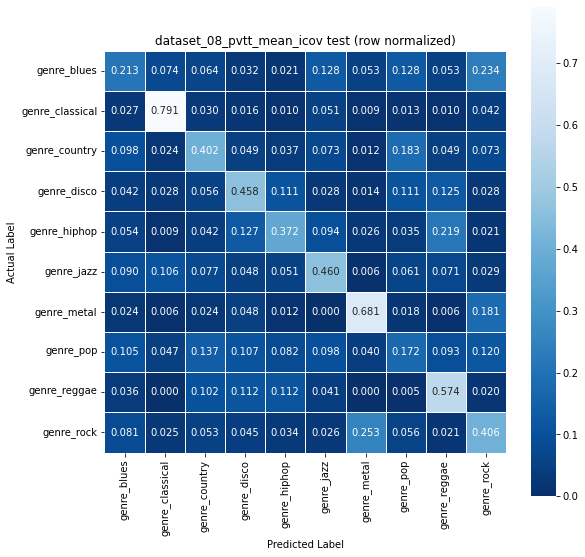



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.547541

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       0.13    0.44      0.20      374  0.21
  genre_classical       0.89    0.82      0.86     4221  0.81
    genre_country       0.20    0.70      0.31      327  0.35
      genre_disco       0.17    0.70      0.27      289  0.32
     genre_hiphop       0.62    0.55      0.58     1701  0.54
       genre_jazz       0.45    0.58      0.51     1241  0.47
      genre_metal       0.37    0.79      0.50      665  0.51
        genre_pop       0.65    0.26      0.37     4274  0.31
     genre_reggae       0.48    0.69      0.56      788  0.55
       genre_rock       0.65    0.45      0.54     3200  0.46
                                                             
         accuracy                         0.55    17080  0.49
        macro avg       0.46    0.60      0.47    17080      
     weighted avg       0.65    0.55

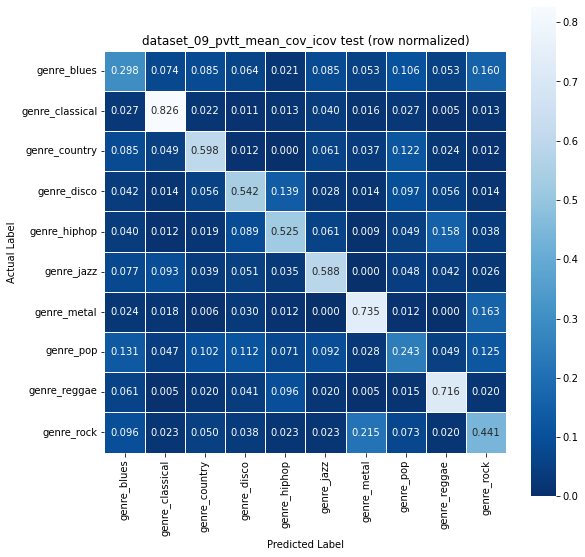



Dataset: ../../../datasets/dataset_10_melspecs_flattened.pickle



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: train_accuracy = 0.999239

                   precision  recall  f1-score  support   mcc
                                                             
      genre_blues       1.00    1.00      1.00      374  1.00
  genre_classical       1.00    1.00      1.00     4221  1.00
    genre_country       1.00    1.00      1.00      327  1.00
      genre_disco       1.00    1.00      1.00      289  1.00
     genre_hiphop       1.00    1.00      1.00     1701  1.00
       genre_jazz       1.00    1.00      1.00     1241  1.00
      genre_metal       1.00    1.00      1.00      665  1.00
        genre_pop       1.00    1.00      1.00     4274  1.00
     genre_reggae       0.99    1.00      1.00      788  1.00
       genre_rock       1.00    1.00      1.00     3200  1.00
                                                             
         accuracy                         1.00    17080  1.00
        macro avg       1.00    1.00      1.00    17080      
     weighted avg       1.00    1.00

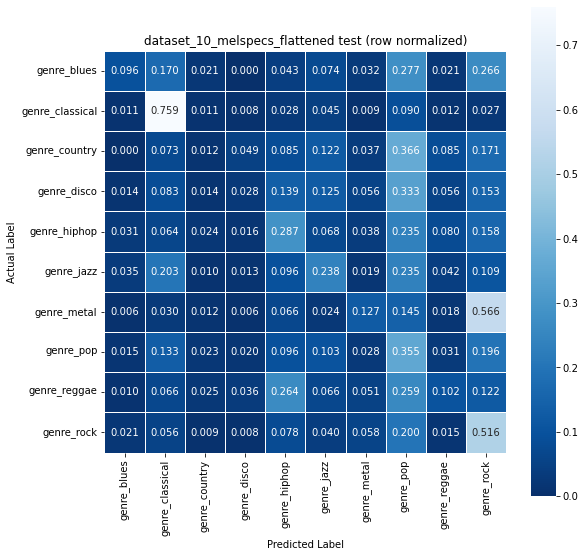

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])
for dataset in datasets:
    logistic_regression_experiment(dataset)